## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [2]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [8]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [11]:
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer="adam")

In [15]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.1124 - acc: 0.6028 - val_loss: 1.4022 - val_acc: 0.5230
Epoch 2/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0882 - acc: 0.6128 - val_loss: 1.3774 - val_acc: 0.5200
Epoch 3/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0895 - acc: 0.6105 - val_loss: 1.3736 - val_acc: 0.5282
Epoch 4/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0568 - acc: 0.6226 - val_loss: 1.3860 - val_acc: 0.5225
Epoch 5/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0332 - acc: 0.6296 - val_loss: 1.3628 - val_acc: 0.5351
Epoch 6/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0290 - acc: 0.6318 - val_loss: 1.4047 - val_acc: 0.5258
Epoch 7/500
50000/50000 [==============================] - 2s 31us/step - loss: 1.0000 - acc: 0.6415 - val_loss: 1.3940 - 

50000/50000 [==============================] - 2s 31us/step - loss: 0.4091 - acc: 0.8526 - val_loss: 2.5396 - val_acc: 0.5107
Epoch 60/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.4152 - acc: 0.8528 - val_loss: 2.6110 - val_acc: 0.5023
Epoch 61/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.3793 - acc: 0.8632 - val_loss: 2.6938 - val_acc: 0.5084
Epoch 62/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.4025 - acc: 0.8547 - val_loss: 2.6882 - val_acc: 0.5149
Epoch 63/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.3859 - acc: 0.8605 - val_loss: 2.6797 - val_acc: 0.4900
Epoch 64/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.3859 - acc: 0.8616 - val_loss: 2.6866 - val_acc: 0.5081
Epoch 65/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.3682 - acc: 0.8682 - val_loss: 2.6834 - val_acc: 0.5064
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1893 - acc: 0.9327 - val_loss: 4.1367 - val_acc: 0.5008
Epoch 119/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.2045 - acc: 0.9265 - val_loss: 4.0986 - val_acc: 0.5013
Epoch 120/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1901 - acc: 0.9323 - val_loss: 4.2796 - val_acc: 0.4914
Epoch 121/500
50000/50000 [==============================] - 2s 30us/step - loss: 0.2318 - acc: 0.9161 - val_loss: 4.1915 - val_acc: 0.5005
Epoch 122/500
50000/50000 [==============================] - 2s 30us/step - loss: 0.2749 - acc: 0.9021 - val_loss: 4.2589 - val_acc: 0.4909
Epoch 123/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.2638 - acc: 0.9071 - val_loss: 4.1629 - val_acc: 0.5002
Epoch 124/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1989 - acc: 0.9289 - val_loss: 4.1958 - val_acc: 0.5024
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 31us/step - loss: 0.2188 - acc: 0.9238 - val_loss: 5.3607 - val_acc: 0.4997
Epoch 177/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1966 - acc: 0.9313 - val_loss: 5.3877 - val_acc: 0.4998
Epoch 178/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1637 - acc: 0.9429 - val_loss: 5.4349 - val_acc: 0.4947
Epoch 179/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1660 - acc: 0.9417 - val_loss: 5.4851 - val_acc: 0.4958
Epoch 180/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1637 - acc: 0.9419 - val_loss: 5.2695 - val_acc: 0.4971
Epoch 181/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1135 - acc: 0.9603 - val_loss: 5.2956 - val_acc: 0.4980
Epoch 182/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1718 - acc: 0.9393 - val_loss: 5.3818 - val_acc: 0.4968
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 31us/step - loss: 0.0965 - acc: 0.9664 - val_loss: 6.3105 - val_acc: 0.4929
Epoch 235/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1602 - acc: 0.9468 - val_loss: 6.1531 - val_acc: 0.4937
Epoch 236/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1788 - acc: 0.9403 - val_loss: 6.2286 - val_acc: 0.4950
Epoch 237/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1666 - acc: 0.9436 - val_loss: 6.2733 - val_acc: 0.4856
Epoch 238/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1162 - acc: 0.9586 - val_loss: 6.2200 - val_acc: 0.4923
Epoch 239/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0837 - acc: 0.9699 - val_loss: 6.0817 - val_acc: 0.4965
Epoch 240/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0817 - acc: 0.9722 - val_loss: 6.3242 - val_acc: 0.4884
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 2s 31us/step - loss: 0.0961 - acc: 0.9666 - val_loss: 6.7385 - val_acc: 0.4946
Epoch 293/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0726 - acc: 0.9746 - val_loss: 6.7733 - val_acc: 0.4933
Epoch 294/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0377 - acc: 0.9880 - val_loss: 6.7780 - val_acc: 0.4988
Epoch 295/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0333 - acc: 0.9897 - val_loss: 6.9539 - val_acc: 0.4997
Epoch 296/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0801 - acc: 0.9738 - val_loss: 6.9522 - val_acc: 0.4842
Epoch 297/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.3758 - acc: 0.8940 - val_loss: 6.7070 - val_acc: 0.4906
Epoch 298/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1516 - acc: 0.9498 - val_loss: 6.6754 - val_acc: 0.5001
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 2s 31us/step - loss: 0.2516 - acc: 0.9264 - val_loss: 7.0382 - val_acc: 0.4909
Epoch 351/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1515 - acc: 0.9513 - val_loss: 7.1526 - val_acc: 0.4852
Epoch 352/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.1041 - acc: 0.9658 - val_loss: 7.2540 - val_acc: 0.4915
Epoch 353/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0426 - acc: 0.9860 - val_loss: 7.3658 - val_acc: 0.4928
Epoch 354/500
50000/50000 [==============================] - 2s 30us/step - loss: 0.0232 - acc: 0.9933 - val_loss: 7.3190 - val_acc: 0.4969
Epoch 355/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0225 - acc: 0.9937 - val_loss: 7.3445 - val_acc: 0.4943
Epoch 356/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0156 - acc: 0.9958 - val_loss: 7.5083 - val_acc: 0.4977
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 2s 31us/step - loss: 0.0681 - acc: 0.9770 - val_loss: 6.6691 - val_acc: 0.4983
Epoch 409/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0298 - acc: 0.9912 - val_loss: 6.9012 - val_acc: 0.4934
Epoch 410/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0198 - acc: 0.9952 - val_loss: 6.8456 - val_acc: 0.5001
Epoch 411/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0105 - acc: 0.9985 - val_loss: 6.9678 - val_acc: 0.5006
Epoch 412/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0066 - acc: 0.9993 - val_loss: 7.0412 - val_acc: 0.4987
Epoch 413/500
50000/50000 [==============================] - 2s 30us/step - loss: 0.0071 - acc: 0.9991 - val_loss: 7.1565 - val_acc: 0.4977
Epoch 414/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0052 - acc: 0.9997 - val_loss: 7.2251 - val_acc: 0.4995
Epoch 415/500
50000/50000 [=======

50000/50000 [==============================] - 2s 31us/step - loss: 0.0064 - acc: 0.9997 - val_loss: 6.4351 - val_acc: 0.5037
Epoch 467/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0055 - acc: 0.9998 - val_loss: 6.5200 - val_acc: 0.5052
Epoch 468/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0048 - acc: 0.9998 - val_loss: 6.5230 - val_acc: 0.5032
Epoch 469/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0051 - acc: 0.9998 - val_loss: 6.6605 - val_acc: 0.5030
Epoch 470/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 6.7548 - val_acc: 0.5039
Epoch 471/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 6.7938 - val_acc: 0.5044
Epoch 472/500
50000/50000 [==============================] - 2s 31us/step - loss: 0.0375 - acc: 0.9900 - val_loss: 7.5235 - val_acc: 0.4542
Epoch 473/500
50000/50000 [=======

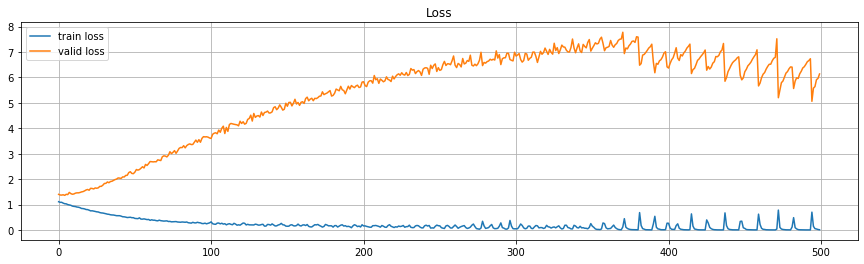

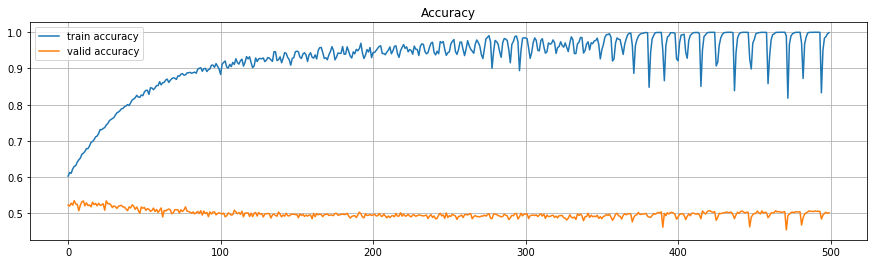

In [16]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.figure(figsize=(15, 4))
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.grid()
plt.show()

In [17]:
model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer="sgd")
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0058 - acc: 0.9999 - val_loss: 6.1477 - val_acc: 0.5026
Epoch 2/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0049 - acc: 1.0000 - val_loss: 6.1721 - val_acc: 0.5030
Epoch 3/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 6.1977 - val_acc: 0.5029
Epoch 4/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 6.2204 - val_acc: 0.5038
Epoch 5/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 6.2417 - val_acc: 0.5032
Epoch 6/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 6.2628 - val_acc: 0.5042
Epoch 7/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 6.2809 - 

50000/50000 [==============================] - 1s 28us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 6.8887 - val_acc: 0.5035
Epoch 60/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 6.8966 - val_acc: 0.5030
Epoch 61/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 6.9055 - val_acc: 0.5038
Epoch 62/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 6.9134 - val_acc: 0.5033
Epoch 63/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 6.9208 - val_acc: 0.5036
Epoch 64/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 6.9283 - val_acc: 0.5036
Epoch 65/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 6.9370 - val_acc: 0.5037
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 7.2819 - val_acc: 0.5048
Epoch 119/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 7.2864 - val_acc: 0.5048
Epoch 120/500
50000/50000 [==============================] - 1s 29us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 7.2919 - val_acc: 0.5053
Epoch 121/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 7.2979 - val_acc: 0.5051
Epoch 122/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 7.3032 - val_acc: 0.5047
Epoch 123/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 7.3084 - val_acc: 0.5050
Epoch 124/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 7.3138 - val_acc: 0.5048
Epoch 125/500
50000/

50000/50000 [==============================] - 1s 28us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.5575 - val_acc: 0.5050
Epoch 177/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.5617 - val_acc: 0.5047
Epoch 178/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.5659 - val_acc: 0.5047
Epoch 179/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.5700 - val_acc: 0.5047
Epoch 180/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.5746 - val_acc: 0.5046
Epoch 181/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.5786 - val_acc: 0.5048
Epoch 182/500
50000/50000 [==============================] - 1s 28us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 7.5821 - val_acc: 0.5047
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 1s 28us/step - loss: 8.8630e-04 - acc: 1.0000 - val_loss: 7.7728 - val_acc: 0.5036
Epoch 234/500
50000/50000 [==============================] - 1s 28us/step - loss: 8.8368e-04 - acc: 1.0000 - val_loss: 7.7763 - val_acc: 0.5035
Epoch 235/500
50000/50000 [==============================] - 1s 28us/step - loss: 8.8068e-04 - acc: 1.0000 - val_loss: 7.7798 - val_acc: 0.5037
Epoch 236/500
50000/50000 [==============================] - 1s 28us/step - loss: 8.7799e-04 - acc: 1.0000 - val_loss: 7.7829 - val_acc: 0.5040
Epoch 237/500
50000/50000 [==============================] - 1s 28us/step - loss: 8.7522e-04 - acc: 1.0000 - val_loss: 7.7862 - val_acc: 0.5036
Epoch 238/500
50000/50000 [==============================] - 1s 28us/step - loss: 8.7231e-04 - acc: 1.0000 - val_loss: 7.7898 - val_acc: 0.5038
Epoch 239/500
50000/50000 [==============================] - 1s 28us/step - loss: 8.6948e-04 - acc: 1.0000 - val_loss: 7.7933 - val_acc: 0.5036
Epoch 

Epoch 290/500
50000/50000 [==============================] - 1s 29us/step - loss: 7.4748e-04 - acc: 1.0000 - val_loss: 7.9509 - val_acc: 0.5035
Epoch 291/500
50000/50000 [==============================] - 1s 29us/step - loss: 7.4546e-04 - acc: 1.0000 - val_loss: 7.9538 - val_acc: 0.5036
Epoch 292/500
50000/50000 [==============================] - 1s 28us/step - loss: 7.4345e-04 - acc: 1.0000 - val_loss: 7.9568 - val_acc: 0.5037
Epoch 293/500
50000/50000 [==============================] - 1s 28us/step - loss: 7.4142e-04 - acc: 1.0000 - val_loss: 7.9597 - val_acc: 0.5036
Epoch 294/500
50000/50000 [==============================] - 1s 28us/step - loss: 7.3925e-04 - acc: 1.0000 - val_loss: 7.9627 - val_acc: 0.5035
Epoch 295/500
50000/50000 [==============================] - 1s 28us/step - loss: 7.3747e-04 - acc: 1.0000 - val_loss: 7.9656 - val_acc: 0.5035
Epoch 296/500
50000/50000 [==============================] - 1s 28us/step - loss: 7.3534e-04 - acc: 1.0000 - val_loss: 7.9685 - val_acc:

Epoch 347/500
50000/50000 [==============================] - 1s 28us/step - loss: 6.4584e-04 - acc: 1.0000 - val_loss: 8.1038 - val_acc: 0.5032
Epoch 348/500
50000/50000 [==============================] - 1s 28us/step - loss: 6.4445e-04 - acc: 1.0000 - val_loss: 8.1063 - val_acc: 0.5029
Epoch 349/500
50000/50000 [==============================] - 1s 28us/step - loss: 6.4277e-04 - acc: 1.0000 - val_loss: 8.1088 - val_acc: 0.5031
Epoch 350/500
50000/50000 [==============================] - 1s 28us/step - loss: 6.4124e-04 - acc: 1.0000 - val_loss: 8.1114 - val_acc: 0.5036
Epoch 351/500
50000/50000 [==============================] - 1s 28us/step - loss: 6.3986e-04 - acc: 1.0000 - val_loss: 8.1137 - val_acc: 0.5033
Epoch 352/500
50000/50000 [==============================] - 1s 28us/step - loss: 6.3840e-04 - acc: 1.0000 - val_loss: 8.1163 - val_acc: 0.5032
Epoch 353/500
50000/50000 [==============================] - 1s 28us/step - loss: 6.3679e-04 - acc: 1.0000 - val_loss: 8.1186 - val_acc:

Epoch 404/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.6836e-04 - acc: 1.0000 - val_loss: 8.2376 - val_acc: 0.5027
Epoch 405/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.6718e-04 - acc: 1.0000 - val_loss: 8.2398 - val_acc: 0.5029
Epoch 406/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.6601e-04 - acc: 1.0000 - val_loss: 8.2420 - val_acc: 0.5027
Epoch 407/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.6483e-04 - acc: 1.0000 - val_loss: 8.2444 - val_acc: 0.5029
Epoch 408/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.6346e-04 - acc: 1.0000 - val_loss: 8.2463 - val_acc: 0.5028
Epoch 409/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.6254e-04 - acc: 1.0000 - val_loss: 8.2486 - val_acc: 0.5029
Epoch 410/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.6130e-04 - acc: 1.0000 - val_loss: 8.2509 - val_acc:

Epoch 461/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.0733e-04 - acc: 1.0000 - val_loss: 8.3561 - val_acc: 0.5027
Epoch 462/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.0626e-04 - acc: 1.0000 - val_loss: 8.3579 - val_acc: 0.5028
Epoch 463/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.0522e-04 - acc: 1.0000 - val_loss: 8.3599 - val_acc: 0.5025
Epoch 464/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.0448e-04 - acc: 1.0000 - val_loss: 8.3618 - val_acc: 0.5029
Epoch 465/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.0348e-04 - acc: 1.0000 - val_loss: 8.3640 - val_acc: 0.5027
Epoch 466/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.0257e-04 - acc: 1.0000 - val_loss: 8.3659 - val_acc: 0.5029
Epoch 467/500
50000/50000 [==============================] - 1s 28us/step - loss: 5.0151e-04 - acc: 1.0000 - val_loss: 8.3678 - val_acc:

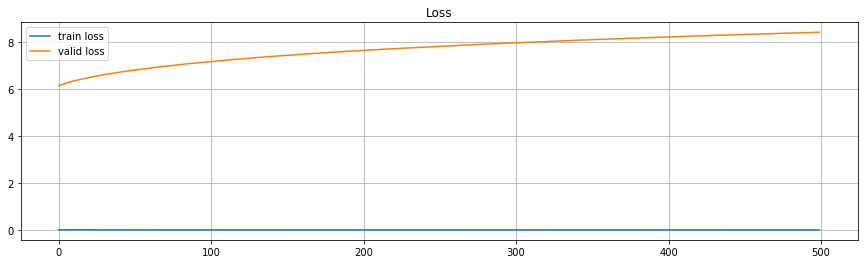

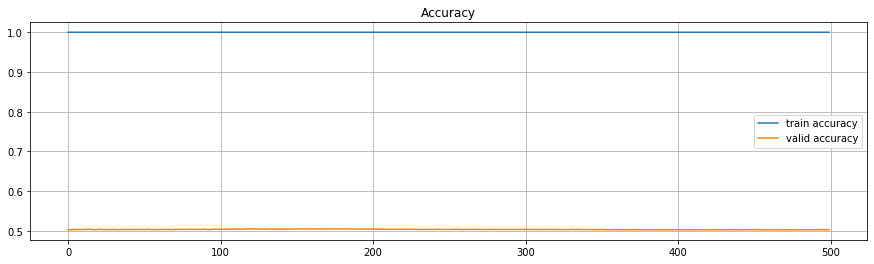

In [18]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.figure(figsize=(15, 4))
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.grid()
plt.show()